In [1]:
import pandas as pd

**ESERCIZIO 1**

In [3]:
# Carico il dataset con formato csv
dataset = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
ds = pd.read_csv(dataset)
# Se volessi utilizzare un altro formato come per esempio excel pd.read_excel(dataset.xlxs)

In [4]:
print(f"Numero di righe nel dataset: {ds.shape[0]}")
print(f"Numero di colonne nel dataset: {ds.shape[1]}")

Numero di righe nel dataset: 429435
Numero di colonne nel dataset: 67


In [5]:
# Riepilogo dei metadati per verificare la veridicità del comando precedente
print("\nInformazioni riguardanti il dataset:")
print(ds.info())


Informazioni riguardanti il dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed             

**ESERCIZIO 2 A**

In [8]:
# Filtra solo i dati che effettivamente mi sono utili (anche se non son sicuro sull utilità del location per l'esercizio 2 ma mi serviranno per i prossimi) 
ds= ds[['continent' , 'icu_patients_per_million' , 'icu_patients' , 'location' , 'date', 'total_cases', 'new_cases_per_million'  , 'new_cases' , 'hosp_patients' , 'total_cases_per_million',]]
# Ripulisco le righe vuote nella sezione continente poichè se non svolgo questo passaggio non mi riesce a dare dei dati giusti 
ds= ds.dropna(subset=['continent'])
ds= ds.dropna(subset=['date'])
ds= ds.dropna(subset=['total_cases'])

In [10]:
# Raggruppo i dati per ogni continente e calcolo direttamente il totale dei casi 
casi_continenti= ds.groupby('continent')['total_cases'].sum()

In [11]:
# Ora devo calcolare i casi mondiali 
casi_mondiali= ds['total_cases'].sum()

In [12]:
# Ora calcolo la percentuale dividento casi_continenti/casi_mondiali e poi moltiplicare il tutto per 100
percentuale_totale= (casi_continenti / casi_mondiali) * 100

In [13]:
print("\nNumero dei casi mondiali:")
print(casi_mondiali)


Numero dei casi mondiali:
715697182101.0


**ESERCIZIO 2 B**

In [14]:
print("\nPercentuale rispetto al totale mondiale:")
print(percentuale_totale)


Percentuale rispetto al totale mondiale:
continent
Africa            2.042328
Asia             35.233800
Europe           33.080567
North America    17.755229
Oceania           1.620525
South America    10.267551
Name: total_cases, dtype: float64


In [18]:
# Converto la colonna 'date' in formato datetime
ds['date'] = pd.to_datetime(ds['date'])

# Seleziono solo i dati relativi all'Italia nel 2022
dati_italia_2022 = ds[(ds['location'] == 'Italy') & (ds['date'].dt.year == 2022)].copy()

**ESERCIZIO 3 A**


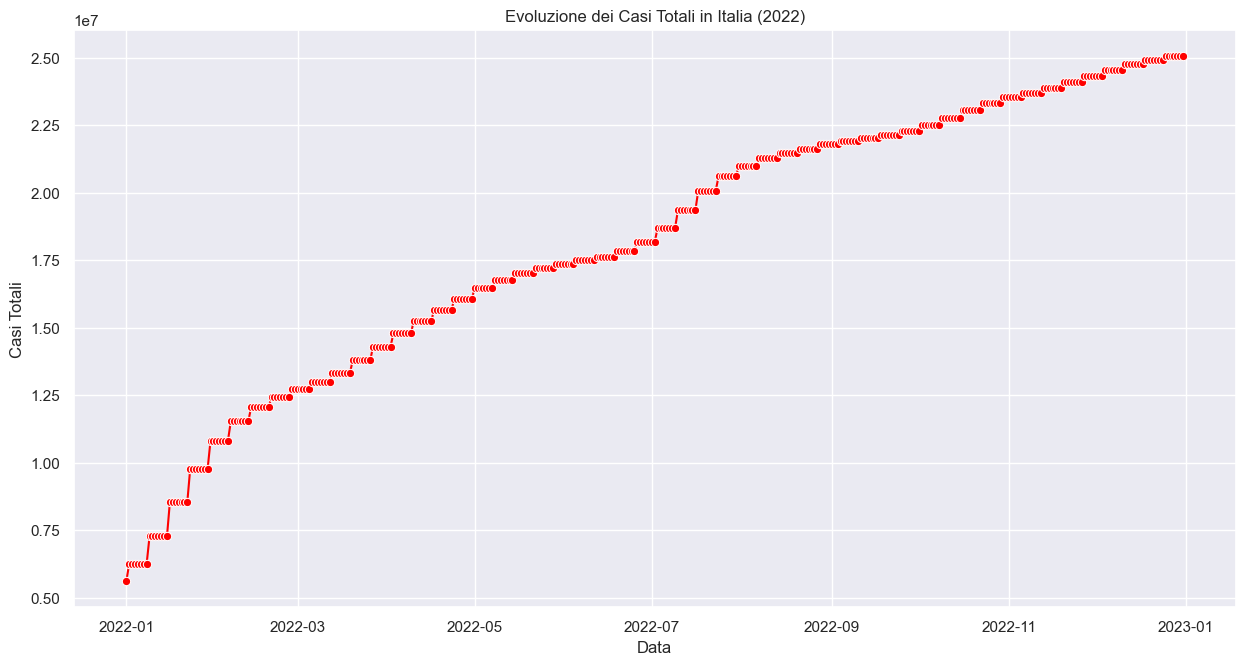

In [46]:
import seaborn as sns
# Utilizzo seaborn per poter visualizzare l'evoluzione dei casi in italia 
plt.figure(figsize=(15,7.5))
sns.lineplot(x=italy_data['date'], y=italy_data['total_cases'], marker='o', color='red')
# Per rendere il grafico completo con relativi titoli sulle varie ascisse ho cercato su internet per poter dargli un aspetto migliore
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei Casi Totali in Italia (2022)')
# Tramite questa aggiunta son riuscito a rendere il grafico più completo
plt.show()

**ESERCIZIO 3 B**

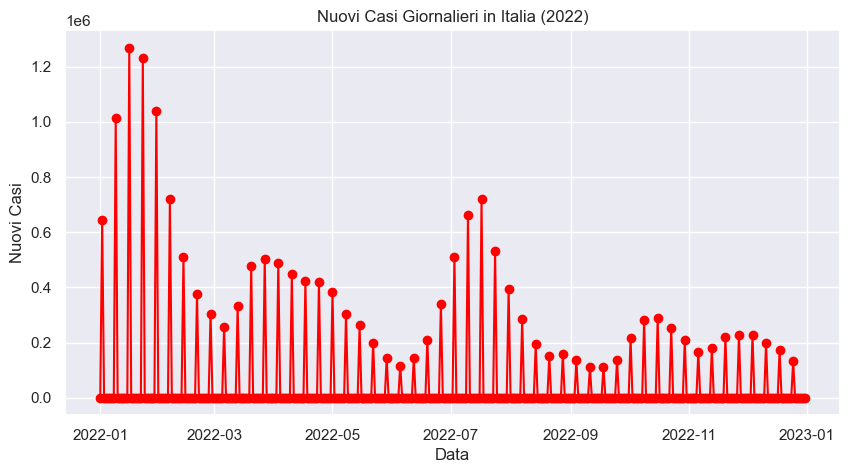

In [65]:
# Io sostituisco i dati nulli con uno 0 
italy_data['new_cases'] = italy_data['new_cases'].fillna(0)
plt.figure(figsize=(10, 5))
plt.plot(italy_data['date'], italy_data['new_cases'], marker='o', linestyle='-', color='red')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Nuovi Casi Giornalieri in Italia (2022)')
plt.show()

-- non capisco perchè mi dia questo tipo di grafico 

**ESERCIZIO 4**

In [57]:
# Filtro i dati come ho fatto con l'italia precedentemente ma questa volta uso una scorciatoia assegnando il nome countries ad = italia, germania e francia
countries = ['Italy', 'Germany', 'France']
ds_filtered = ds[(ds['location'].isin(countries)) & 
                 (ds['date'] >= '2022-05-01') & 
                 (ds['date'] <= '2023-04-30')]


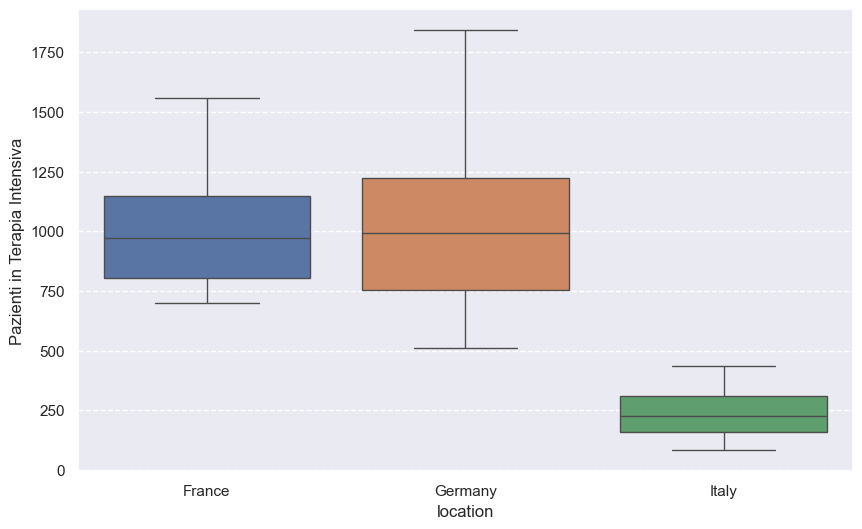

In [58]:
# Creazione del boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=ds_filtered, hue='location',)
plt.ylabel('Pazienti in Terapia Intensiva')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

Tramite questo grafico possiamo notare come la Germania è la nazione che è stata più colpita in temini di pazienti ICU, l'Italia invece è in una posizione quasi intermedia quindi possiamo considerare l'Italia come un Paese con numeri abbastanza uniformi e con valori meno estremi della Germania, per ultima la Francia è quella che si trova nella migliore situazione tra tutti e tre i Paesi

**ESERCIZIO 5 A**

In [62]:
# Filtro nuovamente il tutto ma in questo caso includo anche la spagna e visualizzare solo l'anno 2023

countries_new_included_spain = ['Italy', 'Germany', 'France', 'Spain']
ds_2023 = ds[(ds['location'].isin(countries_new_included_spain)) & (ds['date'].dt.year == 2023)]

In [63]:
# Faccio la somma dei pazienti ospedalizzati
sum_pazienti_osp = ds_2023.groupby('location')['hosp_patients'].sum()

In [64]:
print("Somma dei pazienti ospedalizzati dei 4 paesi:")
print(sum_pazienti_osp)

Somma dei pazienti ospedalizzati dei 4 paesi:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


**ESERCIZIO 5 B**

In [67]:
null_data = ds_2023['hosp_patients'].isnull().sum()
print(f"\nNumero di dati nulli per 'hosp_patients': {null_data}")


Numero di dati nulli per 'hosp_patients': 843


ci sono troppi dati nulli per poter effettuare sostituzioni, non avrebbe senso lavorarci sopra 